# DATA EXPLORATION

## Importing libraries

In [1]:
import hana_ml
print(hana_ml.__version__)
import pandas as pd
from pandas import read_csv
from pandas.plotting import autocorrelation_plot
from datetime import datetime
from pandas import DataFrame
from matplotlib import pyplot
import matplotlib as mpl
import matplotlib.pyplot as plt

2.5.20062605


## SAP HANA Cloud connection

In [2]:
from notebook_hana_connector.notebook_hana_connector import NotebookConnectionContext
conn = NotebookConnectionContext(connectionId = 'HANACloud')

## Read SAP HANA Cloud tables

In [3]:
orders = conn.table(schema = 'HANABOOK_1', table = 'salesapp.tables::ORDERS')
orderdetails = conn.table(schema = 'HANABOOK_1', table = 'salesapp.tables::ORDERDETAILS')
products = conn.table(schema = 'HANABOOK_1', table = 'salesapp.tables::PRODUCTS')

In [4]:
orders.head(n = 5).collect()

ORDERNUMBER   ORDERDATE  CUSTOMERID    SHIPDATE  EMPLOYEEID ORDERTOTAL
0            1  2017-09-02        1018  2017-09-05         707   12751.85
1            2  2017-09-02        1001  2017-09-04         703        816
2            3  2017-09-02        1002  2017-09-05         707   11912.45
3            4  2017-09-02        1009  2017-09-04         703    6601.73
4            5  2017-09-02        1024  2017-09-02         708    5544.75

In [5]:
orderdetails.head(n = 5).collect()

ORDERNUMBER  PRODUCTNUMBER QUOTEDPRICE  QUANTITYORDERED
0            1              1        1200                2
1            1              6         635                3
2            1             11        1650                4
3            1             16          28                1
4            1             21          55                3

In [6]:
products.head(n = 5).collect()

PRODUCTNUMBER                     PRODUCTNAME PRODUCTDESCRIPTION  \
0              1         Trek 9000 Mountain Bike               None   
1              2        Eagle FS-3 Mountain Bike               None   
2              3           Dog Ear Cyclecomputer               None   
3              4  Victoria Pro All Weather Tires               None   
4              5    Dog Ear Helmet Mount Mirrors               None   

  RETAILPRICE  QUANTITYONHAND  CATEGORYID  
0        1200               6           2  
1        1800               8           2  
2          75              20           1  
3       54.95              20           4  
4        7.45              12           1

## Convert the SAP HANA Dataframes to a pandas dataframes

In [7]:
df_orders = orders.collect()

In [8]:
df_orderdetails = orderdetails.collect()

In [9]:
df_products = products.collect()

## Check the structrure of the dataframes

In [10]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ORDERNUMBER  944 non-null    int64 
 1   ORDERDATE    944 non-null    object
 2   CUSTOMERID   944 non-null    int64 
 3   SHIPDATE     944 non-null    object
 4   EMPLOYEEID   944 non-null    int64 
 5   ORDERTOTAL   944 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.4+ KB


In [11]:
df_orderdetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3975 entries, 0 to 3974
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ORDERNUMBER      3975 non-null   int64 
 1   PRODUCTNUMBER    3975 non-null   int64 
 2   QUOTEDPRICE      3975 non-null   object
 3   QUANTITYORDERED  3975 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 124.3+ KB


In [12]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PRODUCTNUMBER       40 non-null     int64 
 1   PRODUCTNAME         40 non-null     object
 2   PRODUCTDESCRIPTION  0 non-null      object
 3   RETAILPRICE         40 non-null     object
 4   QUANTITYONHAND      40 non-null     int64 
 5   CATEGORYID          40 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.0+ KB


# DATA PREPARATION

## Merge of datafiles

In [13]:
df_orderanddetails = pd.merge(df_orders, df_orderdetails,on='ORDERNUMBER')

In [14]:
df_ordersproducts = pd.merge(df_orderanddetails, df_products,on='PRODUCTNUMBER')

In [15]:
df_ordersproducts

ORDERNUMBER   ORDERDATE  CUSTOMERID    SHIPDATE  EMPLOYEEID ORDERTOTAL  \
0               1  2017-09-02        1018  2017-09-05         707   12751.85   
1               3  2017-09-02        1002  2017-09-05         707   11912.45   
2               4  2017-09-02        1009  2017-09-04         703    6601.73   
3               5  2017-09-02        1024  2017-09-02         708    5544.75   
4              10  2017-09-02        1012  2017-09-05         701       2607   
...           ...         ...         ...         ...         ...        ...   
3970          871  2018-02-18        1021  2018-03-21         708    6386.96   
3971          882  2018-02-19        1008  2018-02-23         707     4215.2   
3972          905  2018-02-23        1024  2018-02-25         704    4369.56   
3973          923  2018-02-27        1009  2018-03-02         707     1229.3   
3974          934  2018-02-28        1021  2018-03-01         705     915.04   

      PRODUCTNUMBER QUOTEDPRICE  QUANTITYORDERED               PRODUCTNAME  \
0                 1        1200                2   Trek 9000 Mountain Bike   
1                 1        1164                5   Trek 9000 Mountain Bike   
2                 1        1200                4   Trek 9000 Mountain Bike   
3                 1        1200                4   Trek 9000 Mountain Bike   
4                 1        1200                2   Trek 9000 Mountain Bike   
...             ...         ...              ...                       ...   
3970             15        4.99                4  ProFormance Toe-Klips 2G   
3971             15        4.84                5  ProFormance Toe-Klips 2G   
3972             15        4.99                4  ProFormance Toe-Klips 2G   
3973             15        4.99                2  ProFormance Toe-Klips 2G   
3974             15        4.84                6  ProFormance Toe-Klips 2G   

     PRODUCTDESCRIPTION RETAILPRICE  QUANTITYONHAND  CATEGORYID  
0                  None        1200               6           2  
1                  None        1200               6           2  
2                  None        1200               6           2  
3                  None        1200               6           2  
4                  None        1200               6           2  
...                 ...         ...             ...         ...  
3970               None        4.99              40           4  
3971               None        4.99              40           4  
3972               None        4.99              40           4  
3973               None        4.99              40           4  
3974               None        4.99              40           4  

[3975 rows x 14 columns]

## Eliminate columns

In [16]:
df_finalorders = df_ordersproducts.drop(['CUSTOMERID',
                        'SHIPDATE', 
                        'EMPLOYEEID', 
                        'ORDERTOTAL', 
                        'PRODUCTDESCRIPTION', 
                        'RETAILPRICE', 
                        'QUANTITYONHAND', 
                        'CATEGORYID'],
                         axis = 1)

In [17]:
df_finalorders.head(5)

ORDERNUMBER   ORDERDATE  PRODUCTNUMBER QUOTEDPRICE  QUANTITYORDERED  \
0            1  2017-09-02              1        1200                2   
1            3  2017-09-02              1        1164                5   
2            4  2017-09-02              1        1200                4   
3            5  2017-09-02              1        1200                4   
4           10  2017-09-02              1        1200                2   

               PRODUCTNAME  
0  Trek 9000 Mountain Bike  
1  Trek 9000 Mountain Bike  
2  Trek 9000 Mountain Bike  
3  Trek 9000 Mountain Bike  
4  Trek 9000 Mountain Bike

## Create new columns for total sales by product

In [18]:
df_finalorders["TOTALPRICE"] = df_finalorders["QUOTEDPRICE"]*df_finalorders["QUANTITYORDERED"]

In [19]:
df_finalorders.head(5)

ORDERNUMBER   ORDERDATE  PRODUCTNUMBER QUOTEDPRICE  QUANTITYORDERED  \
0            1  2017-09-02              1        1200                2   
1            3  2017-09-02              1        1164                5   
2            4  2017-09-02              1        1200                4   
3            5  2017-09-02              1        1200                4   
4           10  2017-09-02              1        1200                2   

               PRODUCTNAME TOTALPRICE  
0  Trek 9000 Mountain Bike       2400  
1  Trek 9000 Mountain Bike       5820  
2  Trek 9000 Mountain Bike       4800  
3  Trek 9000 Mountain Bike       4800  
4  Trek 9000 Mountain Bike       2400

## Convert the column ORDERDATE from object to datetime

In [20]:
df_finalorders['ORDERDATE'] = pd.to_datetime(df_finalorders.ORDERDATE)

In [21]:
df_finalorders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3975 entries, 0 to 3974
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      3975 non-null   int64         
 1   ORDERDATE        3975 non-null   datetime64[ns]
 2   PRODUCTNUMBER    3975 non-null   int64         
 3   QUOTEDPRICE      3975 non-null   object        
 4   QUANTITYORDERED  3975 non-null   int64         
 5   PRODUCTNAME      3975 non-null   object        
 6   TOTALPRICE       3975 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 248.4+ KB


In [22]:
df_finalorders.head(5)

ORDERNUMBER  ORDERDATE  PRODUCTNUMBER QUOTEDPRICE  QUANTITYORDERED  \
0            1 2017-09-02              1        1200                2   
1            3 2017-09-02              1        1164                5   
2            4 2017-09-02              1        1200                4   
3            5 2017-09-02              1        1200                4   
4           10 2017-09-02              1        1200                2   

               PRODUCTNAME TOTALPRICE  
0  Trek 9000 Mountain Bike       2400  
1  Trek 9000 Mountain Bike       5820  
2  Trek 9000 Mountain Bike       4800  
3  Trek 9000 Mountain Bike       4800  
4  Trek 9000 Mountain Bike       2400

## Visualize the sales for all the products

In [23]:
df_ordersbydate = df_finalorders.groupby('ORDERDATE', as_index=False).agg({"TOTALPRICE": "sum"})
df_ordersbydate.head(5)

ORDERDATE TOTALPRICE
0 2017-09-02   52083.52
1 2017-09-03   56111.08
2 2017-09-04   34505.04
3 2017-09-05   23538.34
4 2017-09-06   11276.12

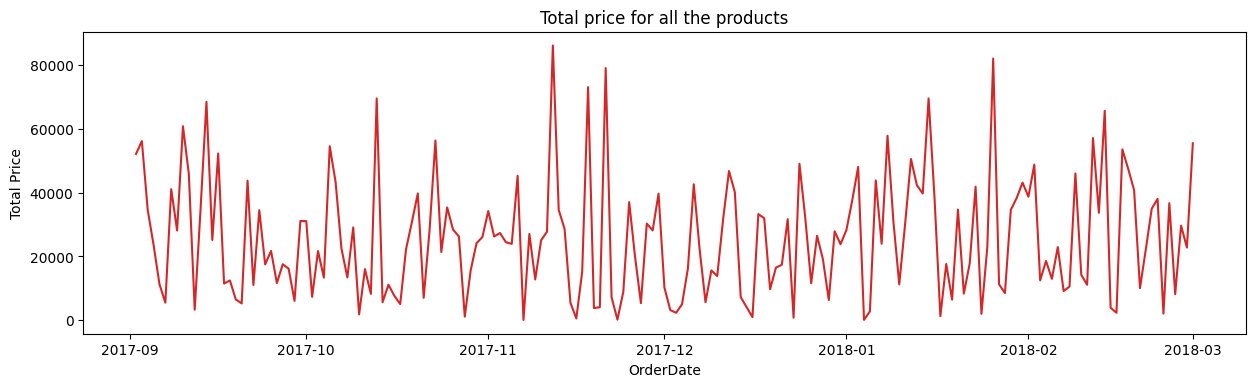

In [24]:
def plot_df(df, x, y, title="", xlabel='OrderDate', ylabel='Total Price', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

    
plot_df(df_ordersbydate, x=df_ordersbydate['ORDERDATE'], y=df_ordersbydate['TOTALPRICE'], title='Total price for all the products')

## Get top sales product to forecast

In [25]:
df_salesfortop1product = df_finalorders.groupby('PRODUCTNUMBER', as_index=False).agg({"TOTALPRICE": "sum"})
df_salesfortop1product = df_salesfortop1product.sort_values(by='TOTALPRICE', ascending=False)
top1product = df_salesfortop1product. iloc[0, 0]
df_finaltop1 = df_finalorders["PRODUCTNUMBER"] == top1product
df_salestop1 = df_finalorders[df_finaltop1]
df_salestop1 = df_salestop1.groupby('ORDERDATE', as_index=False).agg({"TOTALPRICE": "sum"})
df_salestop1.head(5)

ORDERDATE TOTALPRICE
0 2017-09-02      20220
1 2017-09-03      23640
2 2017-09-04      17604
3 2017-09-05      18624
4 2017-09-06       8184

## Visualize the sales for the top product

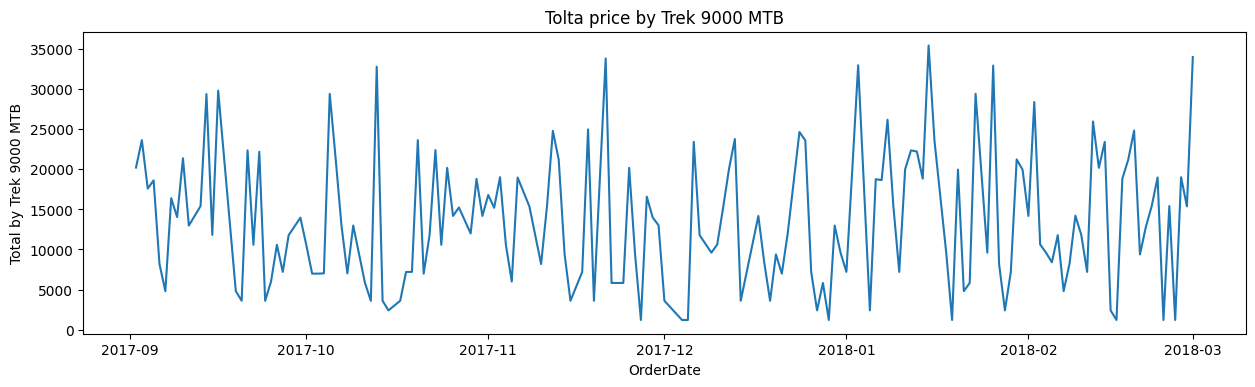

In [26]:
def plot_df(df, x, y, title="", xlabel='OrderDate', ylabel='Total by Trek 9000 MTB', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

    
plot_df(df_salestop1, x=df_salestop1['ORDERDATE'], y=df_salestop1['TOTALPRICE'], title='Tolta price by Trek 9000 MTB')

## Save the final dataset

In [27]:
df_salestop1.to_csv('df_salestop1.csv', header=1, index=False)